# PART 1

In [1]:
import pandas as pd

In [2]:
terrorism = pd.read_csv("terrorism.csv", encoding = "ISO-8859-1")
terrorism.head(5)

C:\Users\jeffery.peterson.tm\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# Change column headers

In [3]:
terrorism.rename(columns = {'iyear':'incident_year',
                          'imonth':'incident_month',
                          'iday':'incident_day',
                            'attacktype1_txt':'attack_type',
                            "nkill":"killed"
                         }, inplace = True)

# Check the DataFrame dimensions

In [4]:
terrorism.shape

(181691, 135)

# Reduce DataFrame dimensions

135 columns is too many for the graph analysis we need to conduct.  Therefore, I am going to drop many of these columns and make a smaller DataFrame.  

This is also necessary so that I can post the data to the discussion board.  Currently, the DataFrame is nearly 200MB.

In [5]:
terrorism = terrorism[["incident_year", "incident_month", "incident_day", "country", "country_txt", "region", "region_txt", "city", "latitude", "longitude", "attack_type", "targtype1_txt", "gname", "weaptype1_txt", "killed", "summary"]]
terrorism.head(5)

,incident_year,incident_month,incident_day,country,country_txt,region,region_txt,city,latitude,longitude,attack_type,targtype1_txt,gname,weaptype1_txt,killed,summary
0,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0,NaN
1,1970,0,0,130,Mexico,1,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,NaN
2,1970,1,0,160,Philippines,5,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Unknown,Unknown,1.0,NaN
3,1970,1,0,78,Greece,8,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN,NaN
4,1970,1,0,101,Japan,4,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN,NaN


In [6]:
terrorism.shape

(181691, 16)

This is the reduced dataset that I will upload to the discussion board.  The size went from 200MB to about 60MB.

In [7]:
terrorism.to_csv("terrorism_reduced.csv")

# What types of variables are in the table

In [8]:
terrorism.describe()

,incident_year,incident_month,incident_day,country,region,latitude,longitude,killed
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000
mean,2002.638997,6.467277,15.505644,131.968501,7.160938,23.498343,-4.587002e+02,2.403272
std,13.259430,3.388303,8.814045,112.414535,2.933408,18.569242,2.047790e+05,11.545741
min,1970.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,0.000000
25%,1991.000000,4.000000,8.000000,78.000000,5.000000,11.510046,4.535999e+00,0.000000
50%,2009.000000,6.000000,15.000000,98.000000,6.000000,31.467463,4.324621e+01,0.000000
75%,2014.000000,9.000000,23.000000,160.000000,10.000000,34.685087,6.871033e+01,2.000000
max,2017.000000,12.000000,31.000000,1004.000000,12.000000,74.633553,1.793667e+02,1570.000000


This looks like we have a good representation of the data.  These should be good to make plots with.  We would be concerned if we saw a lot of zero values, but we don't seem to have any.  We should be good to proceed with our graph analysis. 

**Let's now include the `include = ["O"]` option to get more details.**

In [9]:
terrorism.describe(include = ["O"])

,country_txt,region_txt,city,attack_type,targtype1_txt,gname,weaptype1_txt,summary
count,181691,181691,181257,181691,181691,181691,181691,115562
unique,205,12,36674,9,22,3537,12,112492
top,Iraq,Middle East & North Africa,Unknown,Bombing/Explosion,Private Citizens & Property,Unknown,Explosives,"09/00/2016: Sometime between September 18, 201..."
freq,24636,50474,9775,88255,43511,82782,92426,100


This output provides us some more information on the unique string values we have within our dataset.

# Import the visualization packages

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

**We can now set up the size of our plots**

In [11]:
plt.rcParams["figure.figsize"] = (20,10)

**We now enable the subplot option which allows us to plot multiple datasets in a single output.**

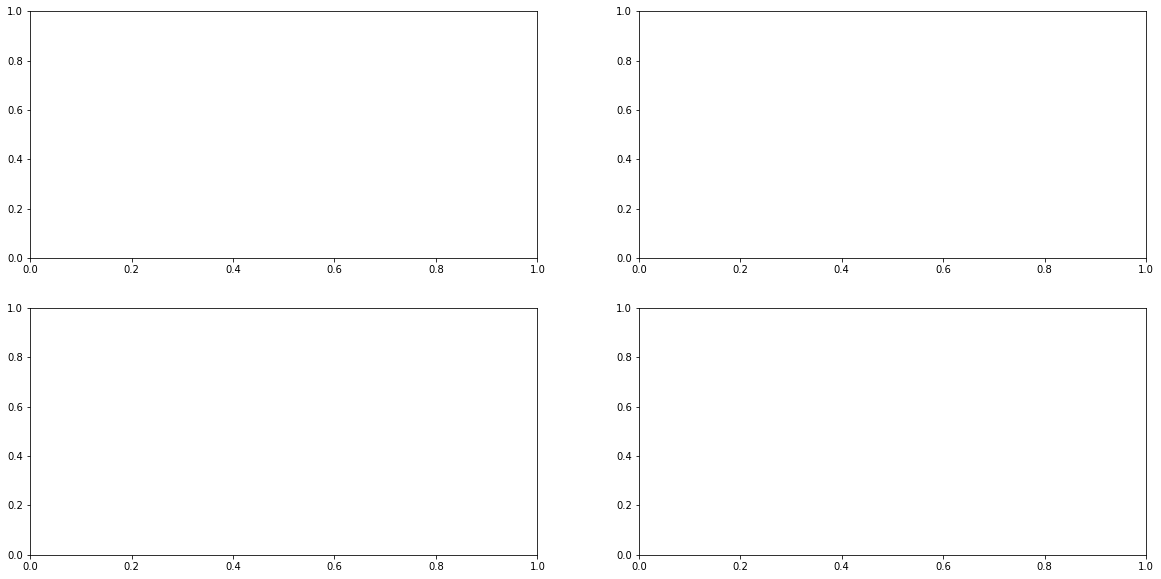

In [12]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)

**This successfully made our plots, now we just need to assign the data and the axis labels to these plots.**

In [13]:
plot_data = ["incident_year", "incident_month", "country", "region"]
x_axis = plot_data
y_axis = ["Counts", "Counts", "Counts", "Counts"]

**Finally, we can draw the plots.  We are going to make histograms.**

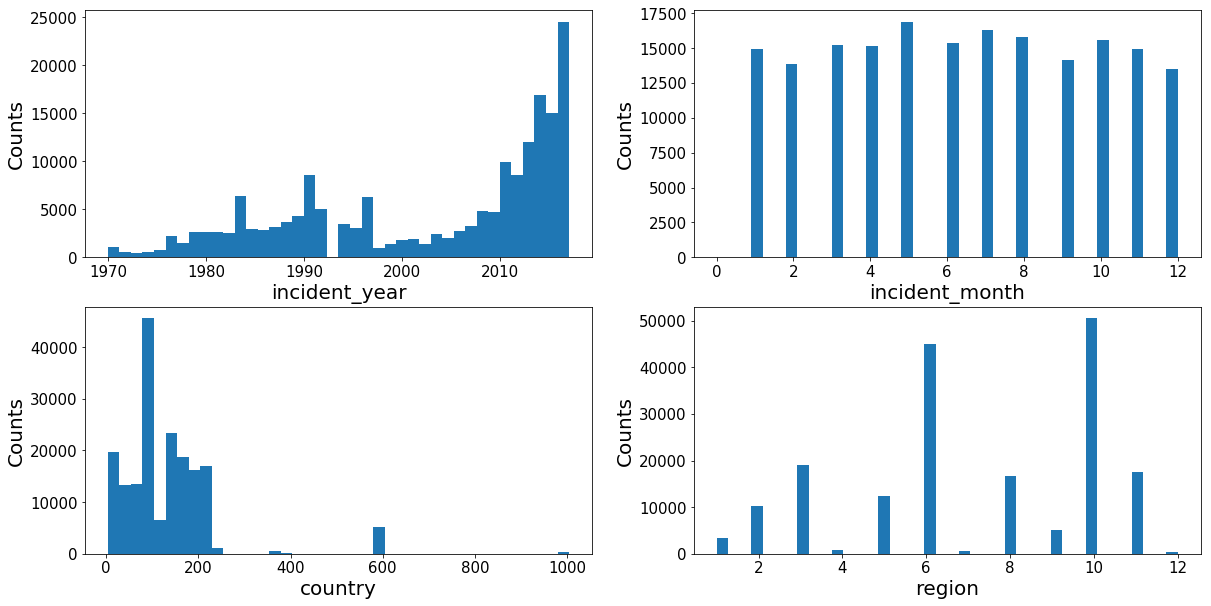

In [14]:
plt.rcParams["figure.figsize"] = (20,10)
fig, axes = plt.subplots(nrows = 2, ncols = 2)
plot_data = ["incident_year", "incident_month", "country", "region"]
x_axis = plot_data
y_axis = ["Counts", "Counts", "Counts", "Counts"]
axes = axes.ravel()

for idx, ax in enumerate(axes):
    ax.hist(terrorism[plot_data[idx]].dropna(), bins = 40)
    ax.set_xlabel(x_axis[idx], fontsize = 20)
    ax.set_ylabel(y_axis[idx], fontsize = 20)
    ax.tick_params(axis = "both", labelsize = 15)

plt.show()

# Now let's make some bar charts

The country and region histograms we made above contain some valuable information.  Unfortunately from those histograms, we don't really know where these terrorism attacks are taking place.  We can make some bar charts that will better illustrate the information that we want to see.

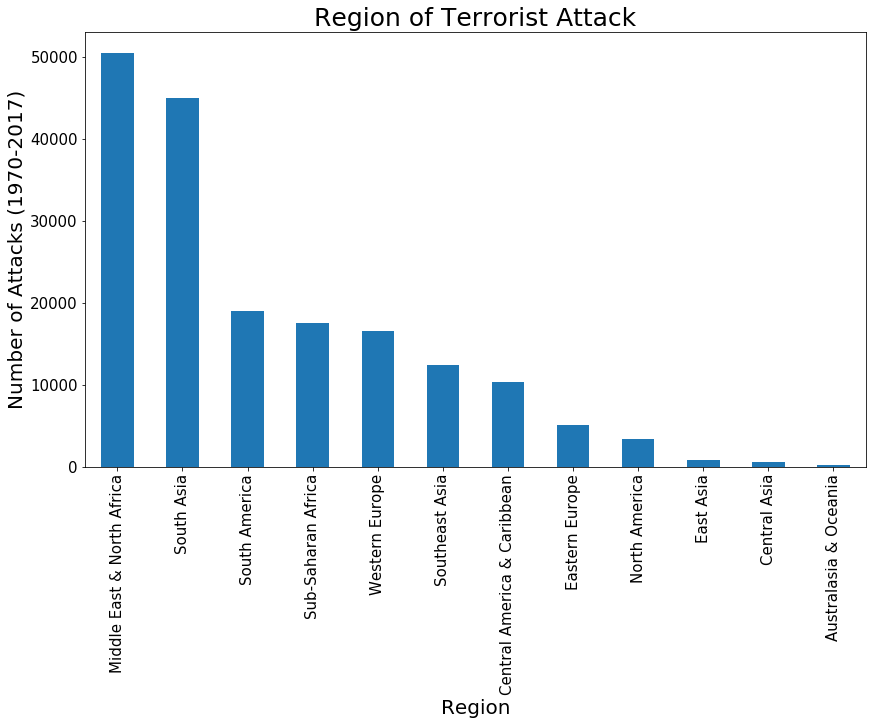

In [15]:
ax = terrorism['region_txt'].value_counts().plot(kind='bar', figsize=(14,8))
ax.set_xlabel("Region", fontsize=20)
ax.set_ylabel("Number of Attacks (1970-2017)", fontsize=20)
ax.set_title("Region of Terrorist Attack", fontsize = 25)
ax.tick_params(axis = "both", labelsize = 15)
plt.show()

No real surprises here.  One would expect the Middle East and North Africa areas to have the greatest number of terrorist attacks.

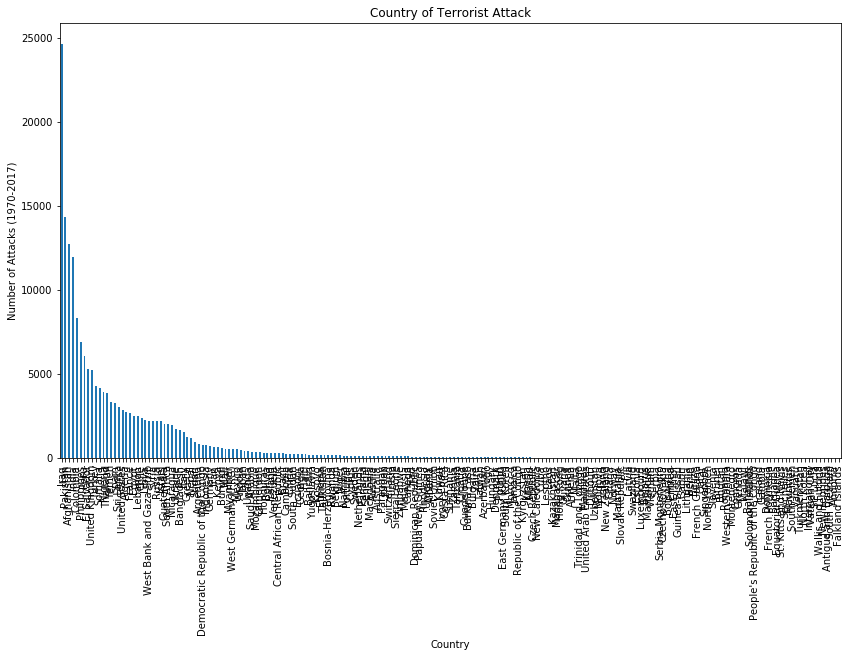

In [16]:
ax = terrorism['country_txt'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Country of Terrorist Attack")
ax.set_xlabel("Country")
ax.set_ylabel("Number of Attacks (1970-2017)")
plt.show()

Obviously there are too many countries here, so I will just show the top 20 and the bottom 20 countries.  This gives us an idea of the most dangerous and safest places to live.

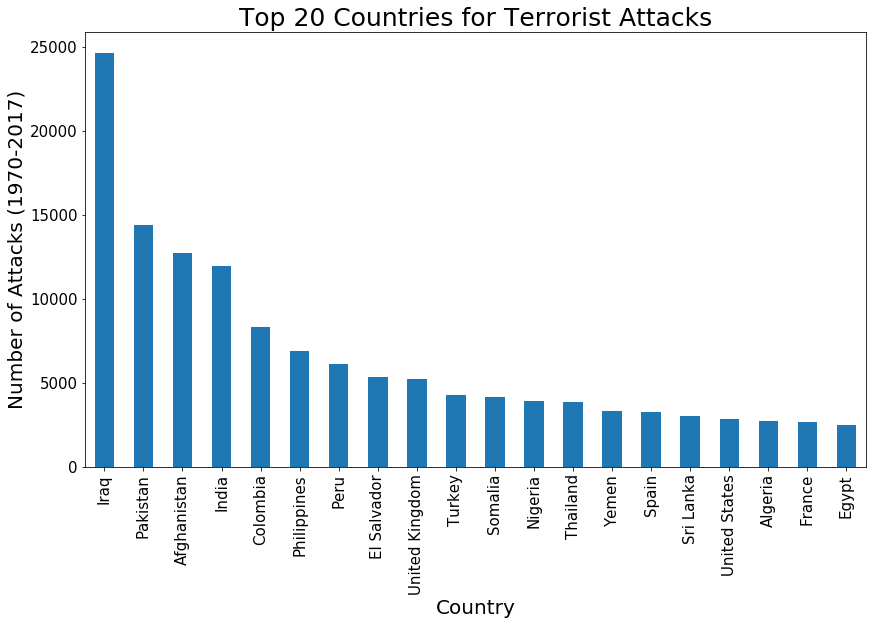

In [17]:
ax = terrorism['country_txt'].value_counts()[:20].plot(kind='bar', figsize=(14,8))
ax.set_xlabel("Country", fontsize=20)
ax.set_ylabel("Number of Attacks (1970-2017)", fontsize=20)
ax.set_title("Top 20 Countries for Terrorist Attacks", fontsize = 25)
ax.tick_params(axis = "both", labelsize = 15)
plt.show()

This plot makes sense as well.  Since we already knew that the Middle East had the most attacks, it's no surprise that Iraq is at the top of the list.

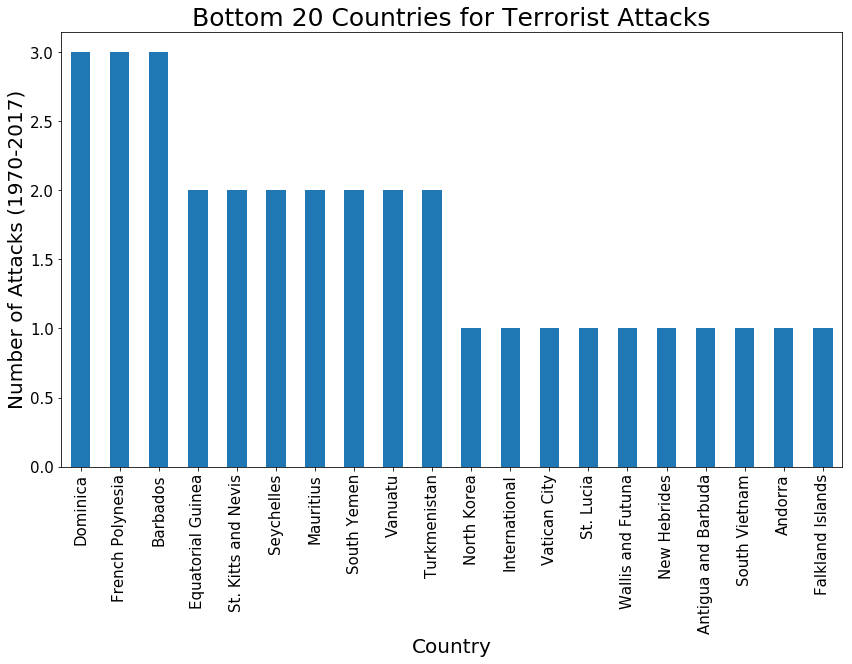

In [18]:
ax = terrorism['country_txt'].value_counts()[-20:].plot(kind='bar', figsize=(14,8))
ax.set_xlabel("Country", fontsize=20)
ax.set_ylabel("Number of Attacks (1970-2017)", fontsize=20)
ax.set_title("Bottom 20 Countries for Terrorist Attacks", fontsize = 25)
ax.tick_params(axis = "both", labelsize = 15)
plt.show()

This resolution provides a much better picture of where attacks are most and least likely to occur. 

One interesting note is that Yemen is on the list of the Top 20 sites, while South Yemen is on the Bottom 20 list.  I'm a little surprised that North Korea only has 1 reported terrorist attack.  I'm guess the key word there is "reported".

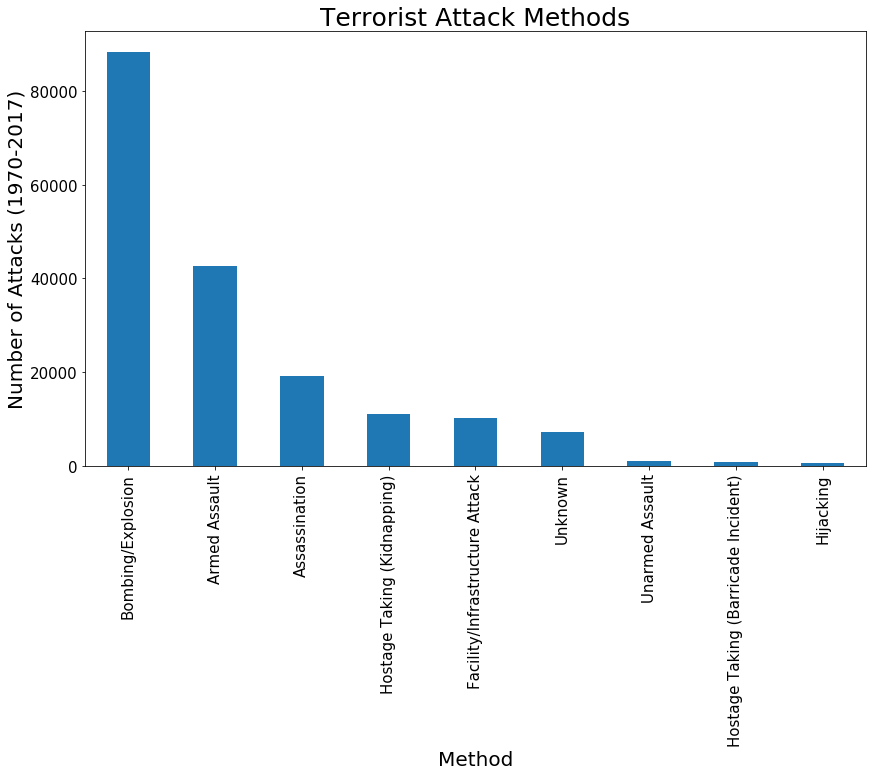

In [19]:
ax = terrorism['attack_type'].value_counts().plot(kind='bar', figsize=(14,8))
ax.set_xlabel("Method", fontsize=20)
ax.set_ylabel("Number of Attacks (1970-2017)", fontsize=20)
ax.set_title("Terrorist Attack Methods", fontsize = 25)
ax.tick_params(axis = "both", labelsize = 15)
plt.show()

Bombings are the highly favored method of terrorist attack.  The Unknown values is of some concern.  What is meant by unknown?  Either it was an attack or it wasn't.

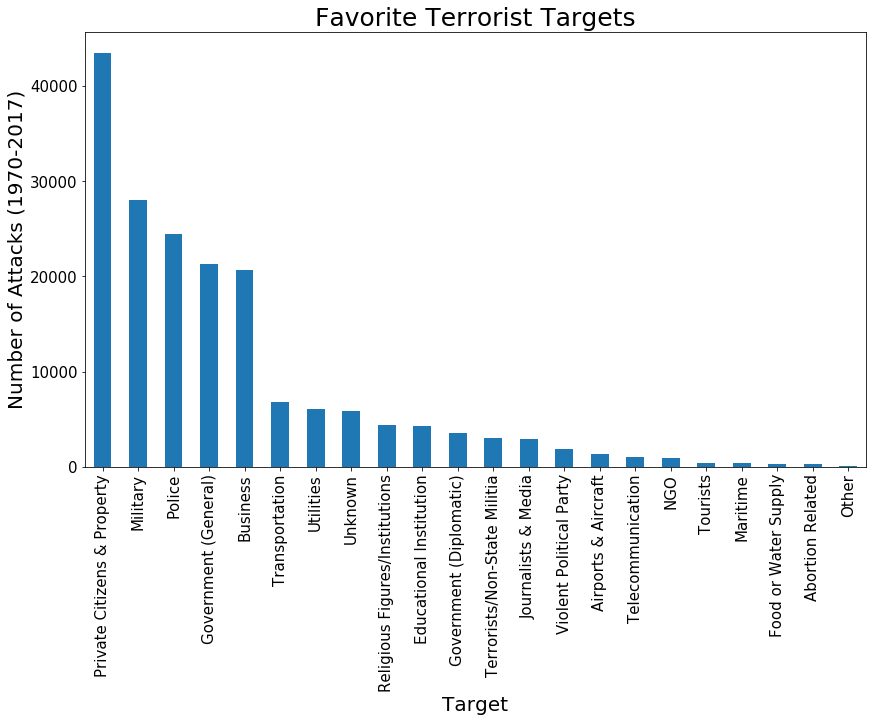

In [20]:
ax = terrorism['targtype1_txt'].value_counts().plot(kind='bar', figsize=(14,8))
ax.set_xlabel("Target", fontsize=20)
ax.set_ylabel("Number of Attacks (1970-2017)", fontsize=20)
ax.set_title("Favorite Terrorist Targets", fontsize = 25)
ax.tick_params(axis = "both", labelsize = 15)
plt.show()

What is interesting here is that Tourists is it's own category.  I would think those numbers should be lumped in with the Private Citizens data.  On the plus side, it's comforting to see that the Food and Water Supply values are so low.  One would think this would be a prime terrorist target.  These low numbers are likely security related.

# Let's look at a line chart

We can also look and see how terrorist attacks are trending.  I am going to try the Seaborn module for this plot.  

**Are attacks in certain regions increasing or decreasing?**

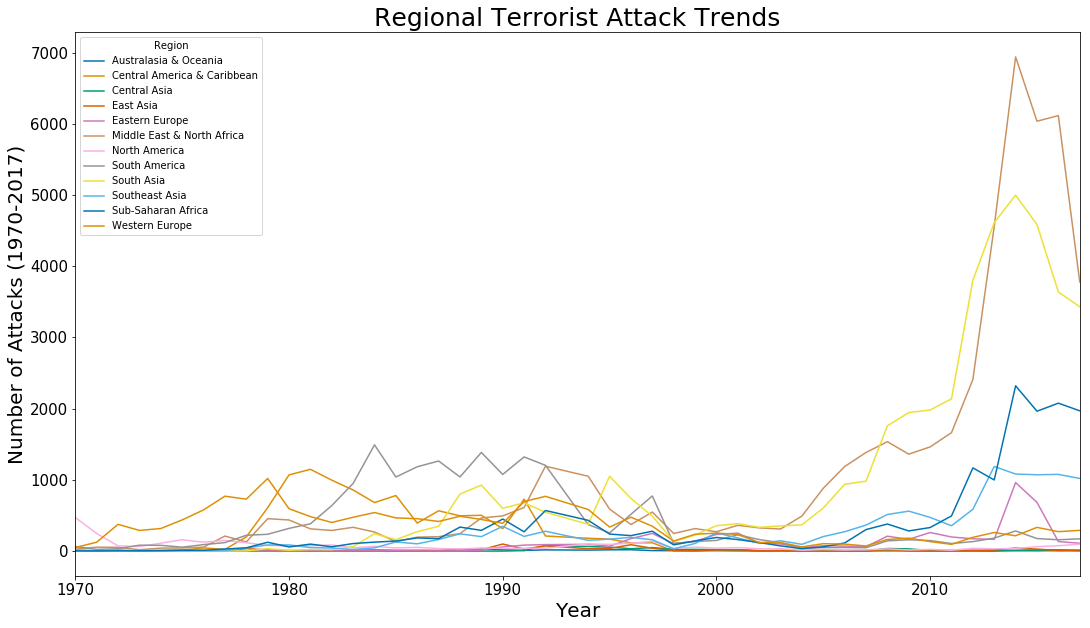

In [21]:
import seaborn as sns


terror_region = pd.crosstab(terrorism.incident_year, terrorism.region_txt)
terror_region.plot(color = sns.color_palette('colorblind',12))
fig=plt.gcf()
fig.set_size_inches(18,10)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Number of Attacks (1970-2017)", fontsize=20)
plt.title("Regional Terrorist Attack Trends", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(title='Region')
plt.show()

This kind of plot is great for illustrating trends over time.  We can see that most regions saw a sharp uptake in terrorist attacks around 2004.  It appears, however, that the overall trend is going down.  That's good to see!

# Visualizing the Pearson's Ranking

In [22]:
from yellowbrick.features import Rank2D
plt.rcParams["figure.figsize"] = (15,7)

In [23]:
x = terrorism[plot_data].as_matrix()
x

C:\Users\jeffery.peterson.tm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[1970,    7,   58,    2],
       [1970,    0,  130,    1],
       [1970,    1,  160,    5],
       ...,
       [2017,   12,  160,    5],
       [2017,   12,   92,    6],
       [2017,   12,  160,    5]], dtype=int64)

In [24]:
pearson = Rank2D(features = plot_data, algorithm = "pearson")

array([[1970,    7,   58,    2],
       [1970,    0,  130,    1],
       [1970,    1,  160,    5],
       ...,
       [2017,   12,  160,    5],
       [2017,   12,   92,    6],
       [2017,   12,  160,    5]], dtype=int64)

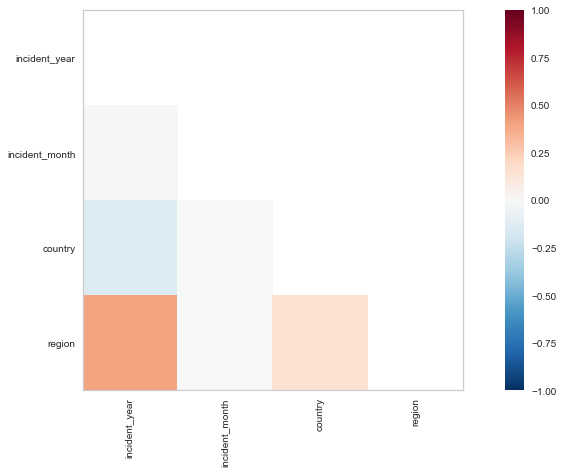

In [25]:
pearson.fit(x)
pearson.transform(x)

From this correlation plot, we can see that the strongest correlation is between the region where an attack occurred and the year that it happened.

# Let's look at a geographical plot

Since our data contains latitude and longitude coordinates, it makes sense to plot these on a map for a quick overview of likely terrorist hotspots.  

Let's look at terrorist attacks in the United States.

In [26]:
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

After loading the correct libraries, we need to find a shapefile of the United States.  This will serve as the backdrop image to which we will add our geographical data points.

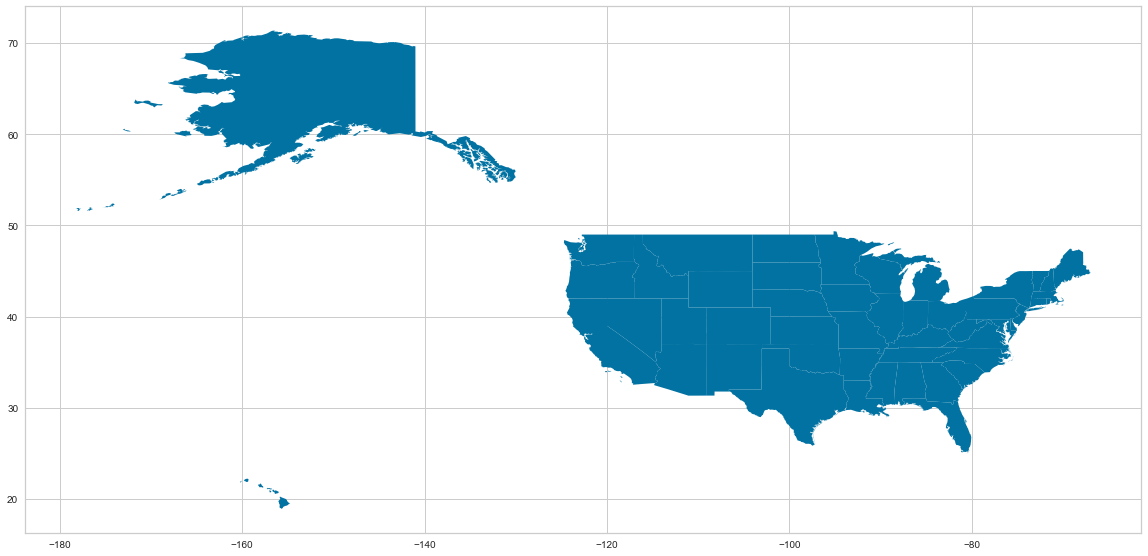

In [27]:
usa_map = gpd.read_file("states.shp")
fig, ax = plt.subplots(figsize = (20,15))
usa_map.plot(ax=ax)

This next part of the code creates *points*.  A *point* is a single object that describes the longitude and latitude of a data point.  

We are also creating a subset of the original data that only includes the United States.

In [28]:
usa = terrorism[terrorism["country_txt"] == "United States"]
geometry = [Point(xy) for xy in zip(usa["longitude"], usa["latitude"])]
crs = {'init': 'epsg:4326'}

We can see that a column called **geometry** has been added to our DataFrame.

In [29]:
geo_df = gpd.GeoDataFrame(usa, crs = crs, geometry = geometry)
geo_df.head(5)

,incident_year,incident_month,incident_day,country,country_txt,region,region_txt,city,latitude,longitude,attack_type,targtype1_txt,gname,weaptype1_txt,killed,summary,geometry
5,1970,1,1,217,United States,1,North America,Cairo,37.005105,-89.176269,Armed Assault,Police,Black Nationalists,Firearms,0.0,1/1/1970: Unknown African American assailants ...,POINT (-89.17626899999999 37.005105)
7,1970,1,2,217,United States,1,North America,Oakland,37.791927,-122.225906,Bombing/Explosion,Utilities,Unknown,Explosives,0.0,1/2/1970: Unknown perpetrators detonated explo...,POINT (-122.225906 37.791927)
8,1970,1,2,217,United States,1,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,Military,New Year's Gang,Incendiary,0.0,"1/2/1970: Karl Armstrong, a member of the New ...",POINT (-89.412488 43.076592)
9,1970,1,3,217,United States,1,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,Government (General),New Year's Gang,Incendiary,0.0,"1/3/1970: Karl Armstrong, a member of the New ...",POINT (-89.38669399999999 43.07295)
10,1970,1,1,217,United States,1,North America,Baraboo,43.468500,-89.744299,Bombing/Explosion,Military,"Weather Underground, Weathermen",Explosives,0.0,NaN,POINT (-89.744299 43.4685)


The data we are going to be looking at are all the locations in the United States where terrorist attacks occurred.  These will be further referenced by whether anyone was killed during these attacks or not.

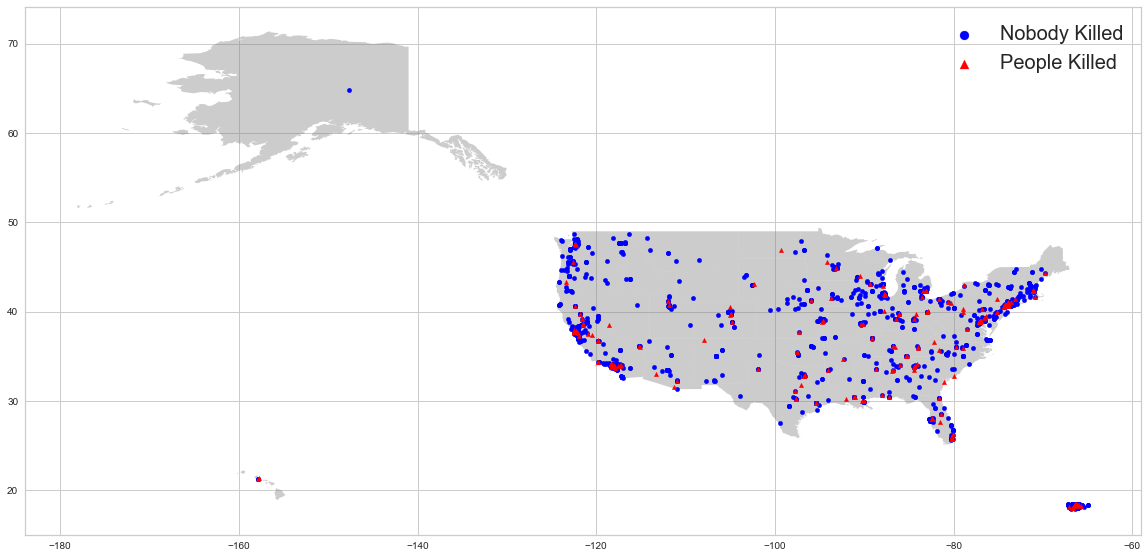

In [30]:
fig, ax = plt.subplots(figsize = (20,15))
usa_map.plot(ax = ax, alpha = 0.4, color = "grey")
geo_df[geo_df["killed"] == 0].plot(ax=ax, markersize = 20, color = "blue", marker = "o", label = "Nobody Killed")
geo_df[geo_df["killed"] != 0].plot(ax=ax, markersize = 20, color = "red", marker = "^", label = "People Killed")
plt.legend(prop={"size":20}, markerscale=2)

This kind of plot provides a quick and accurate way to view a lot of geographical information.

# Stacked bar chart

A stacked bar chart is a great way to do a quick comparison between binary values.  

For our plot, we will compare how effective various attack methods are at killing people.

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

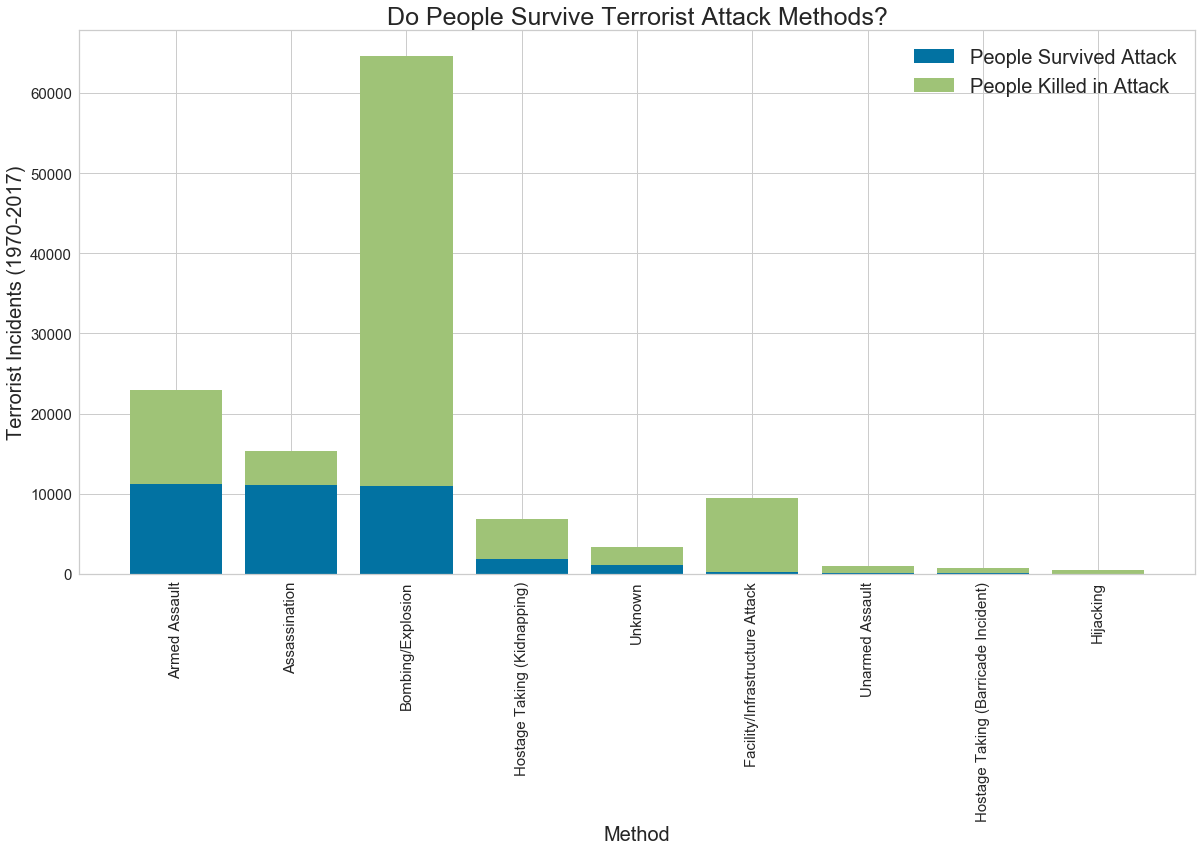

In [31]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)
fix, axes = plt.subplots()

terrorism["killed"].astype(bool).astype(int)

terror_survived = terrorism.replace({'killed': {0: 'Nobody Killed', 1: 'People Killed'}})[terrorism['killed']==1]['attack_type'].value_counts()
terror_not_survived = terrorism.replace({'killed': {1: 'killed', 0: 'Nobody Killed'}})[terrorism['killed']==0]['attack_type'].value_counts()
terror_not_survived = terror_not_survived.reindex(index = terror_survived.index)

p1 = axes.bar(terror_survived.index, terror_survived.values)
p2 = axes.bar(terror_not_survived.index, terror_not_survived.values, bottom=terror_survived.values)

axes.set_title('Do People Survive Terrorist Attack Methods?', fontsize=25)
axes.set_ylabel('Terrorist Incidents (1970-2017)', fontsize=20)
axes.tick_params(axis='both', labelsize=15)
axes.set_xlabel("Method", fontsize=20)
axes.legend((p1[0], p2[0]), ('People Survived Attack', 'People Killed in Attack'), fontsize = 20)
plt.xticks(rotation=90)

We can see that assassinations are the most effective way of killing people, while bombing/explosions are responsible for killing the most people.

# Word cloud visualization

Since we have text in our dataset, a word cloud visualization is a good way to get an overview of commonly used terms relating to the terrorist attack descriptions.

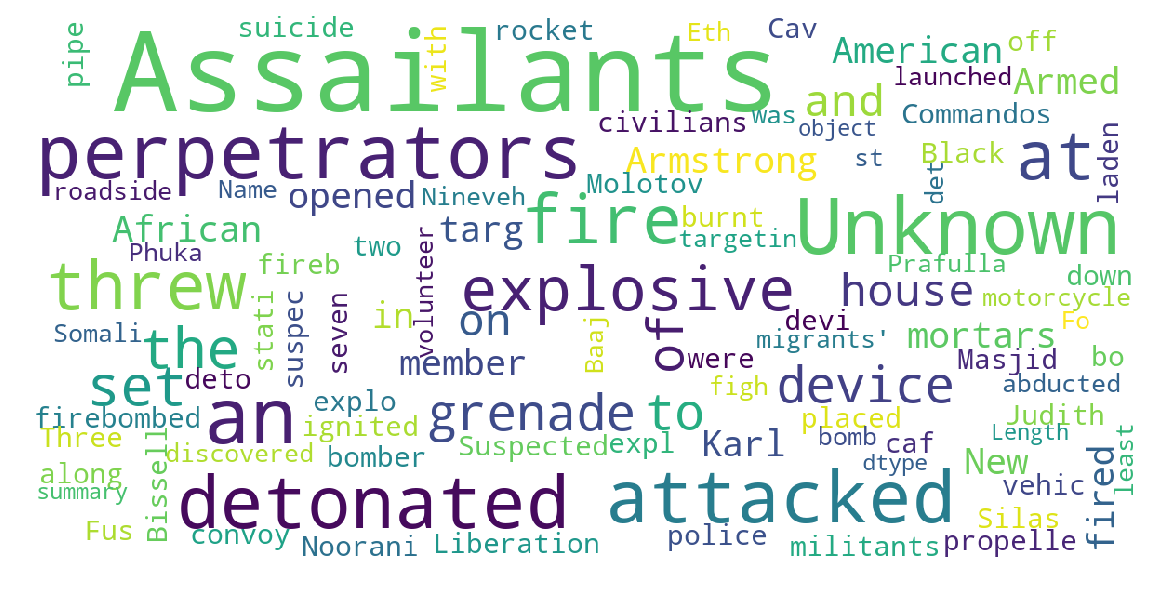

In [32]:
# wordcloud function
%matplotlib inline
from wordcloud import WordCloud

stop_words = ["NaN", " "]
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        stopwords = stop_words,
        collocations = False,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(terrorism["summary"])

This output shows us the key words from our summary column in the DataFrame.  We can see that words like **Assailants, Unknown, and detonated** are very common words that are used to describe terrorist attacks.

# PART 2

**Fill in missing values and eliminate features**

For the terrorism data set, there are two columns that are missing values, "incident_month" and "incident_day".  I will follow the Titanic example and change these missing values to the median value for those columns.  

I will use the Pandas `replace()` function to make the change.

In [33]:
print(terrorism["incident_month"].describe())

count    181691.000000
mean          6.467277
std           3.388303
min           0.000000
25%           4.000000
50%           6.000000
75%           9.000000
max          12.000000
Name: incident_month, dtype: float64


In [34]:
terrorism['incident_month']=terrorism['incident_month'].replace(0,terrorism['incident_month'].median())

In [35]:
print(terrorism["incident_month"].describe())

count    181691.000000
mean          6.467937
std           3.387627
min           1.000000
25%           4.000000
50%           6.000000
75%           9.000000
max          12.000000
Name: incident_month, dtype: float64


We have eliminated the zero values.  

We will repeat the process with the "incident_day" column.

In [36]:
print(terrorism["incident_day"].describe())

count    181691.000000
mean         15.505644
std           8.814045
min           0.000000
25%           8.000000
50%          15.000000
75%          23.000000
max          31.000000
Name: incident_day, dtype: float64


In [37]:
terrorism['incident_day']=terrorism['incident_day'].replace(0,terrorism['incident_day'].median())
print(terrorism["incident_day"].describe())

count    181691.000000
mean         15.579203
std           8.746668
min           1.000000
25%           8.000000
50%          15.000000
75%          23.000000
max          31.000000
Name: incident_day, dtype: float64


We have successfully replaced the zero values with the median column values.

**Log transformation**

Next, we will perform a log transformation on the Country data.  This is because we have fares that range from 4 to 1004.  By performing a log transformation, we can compensate for the large skew that would result from using the regular fare values.  

First, we will import the `numpy` library and then define our log transformation function.

Now normally we wouldn't do this for country names, but this is the only column in our data set that lends itself to this log transformation.

In [38]:
import numpy as np

def log_transformation(terrorism):
    return terrorism.apply(np.log1p)

This following code will add a new column called "Country_log1p" to our DataFrame.

In [39]:
terrorism["Country_log1p"] = log_transformation(terrorism["country"])
print(terrorism.describe())

       incident_year  incident_month   incident_day        country  \
count  181691.000000   181691.000000  181691.000000  181691.000000   
mean     2002.638997        6.467937      15.579203     131.968501   
std        13.259430        3.387627       8.746668     112.414535   
min      1970.000000        1.000000       1.000000       4.000000   
25%      1991.000000        4.000000       8.000000      78.000000   
50%      2009.000000        6.000000      15.000000      98.000000   
75%      2014.000000        9.000000      23.000000     160.000000   
max      2017.000000       12.000000      31.000000    1004.000000   

              region       latitude     longitude         killed  \
count  181691.000000  177135.000000  1.771340e+05  171378.000000   
mean        7.160938      23.498343 -4.587002e+02       2.403272   
std         2.933408      18.569242  2.047790e+05      11.545741   
min         1.000000     -53.154613 -8.618590e+07       0.000000   
25%         5.000000      11.

**Adjust skewed data (country)**

Let's check our country distribution with a histogram.  

We start by setting up our plotting parameters like we did in Part 1.

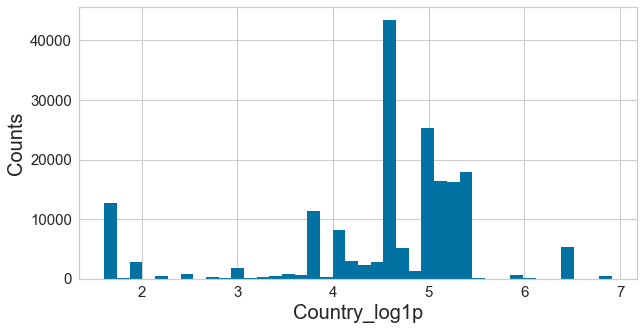

In [40]:
plt.rcParams["figure.figsize"] = (10,5)
plt.hist(terrorism["Country_log1p"], bins = 40)
plt.xlabel("Country_log1p", fontsize = 20)
plt.ylabel("Counts", fontsize = 20)
plt.tick_params(axis = "both", labelsize = 15)
plt.show()

Now let's see how our log normal plot compares to our original country histogram.

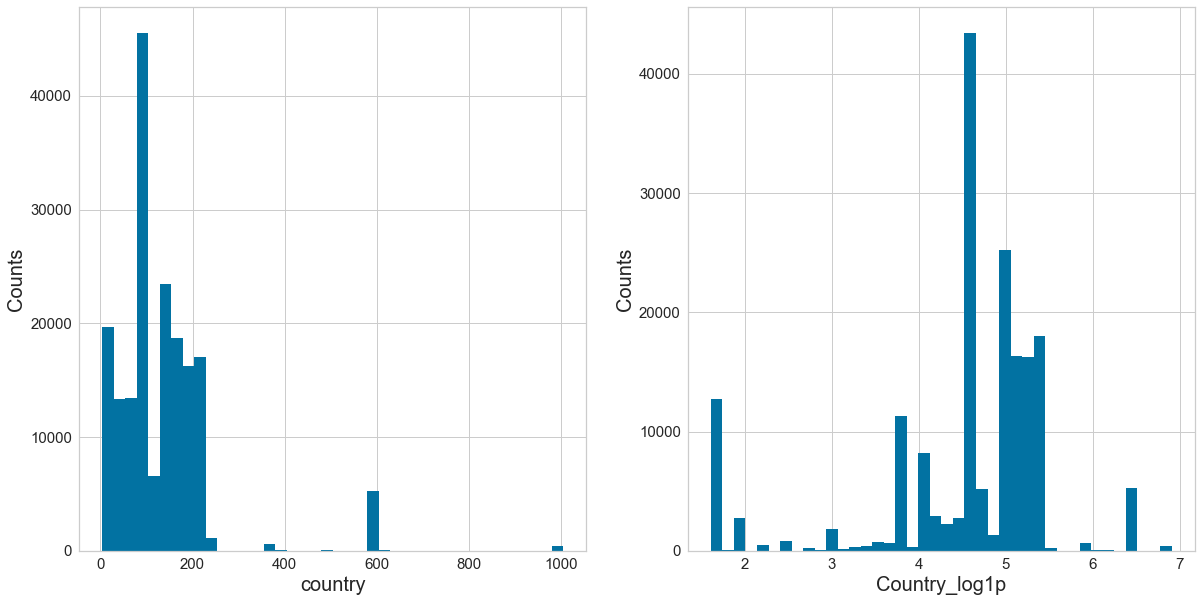

In [41]:
plt.rcParams["figure.figsize"] = (20,10)
fig, axes = plt.subplots(nrows = 1, ncols = 2)
plot_data = ["country", "Country_log1p"]
x_axis = plot_data
y_axis = ["Counts", "Counts"]
axes = axes.ravel()

for idx, ax in enumerate(axes):
    ax.hist(terrorism[plot_data[idx]].dropna(), bins = 40)
    ax.set_xlabel(x_axis[idx], fontsize = 20)
    ax.set_ylabel(y_axis[idx], fontsize = 20)
    ax.tick_params(axis = "both", labelsize = 15)

plt.show()

Our log plot gives us a much better distribution.

**UPDATE**  

**Based on classmate feedback, it was suggested I do a log transformation of the "killed" data as well.  Following that suggestion, here is that transformation.**

       incident_year  incident_month   incident_day        country  \
count  181691.000000   181691.000000  181691.000000  181691.000000   
mean     2002.638997        6.467937      15.579203     131.968501   
std        13.259430        3.387627       8.746668     112.414535   
min      1970.000000        1.000000       1.000000       4.000000   
25%      1991.000000        4.000000       8.000000      78.000000   
50%      2009.000000        6.000000      15.000000      98.000000   
75%      2014.000000        9.000000      23.000000     160.000000   
max      2017.000000       12.000000      31.000000    1004.000000   

              region       latitude     longitude         killed  \
count  181691.000000  177135.000000  1.771340e+05  171378.000000   
mean        7.160938      23.498343 -4.587002e+02       2.403272   
std         2.933408      18.569242  2.047790e+05      11.545741   
min         1.000000     -53.154613 -8.618590e+07       0.000000   
25%         5.000000      11.

C:\Users\jeffery.peterson.tm\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\jeffery.peterson.tm\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


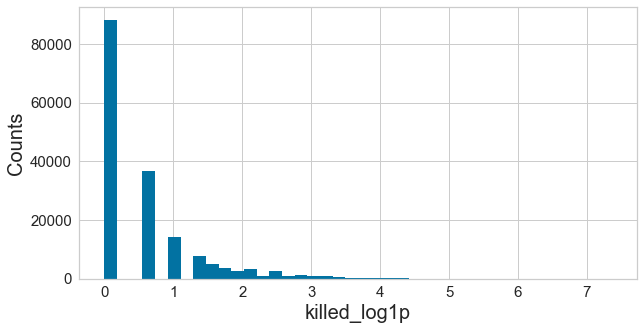

In [42]:
import numpy as np

def log_transformation(terrorism):
    return terrorism.apply(np.log1p)

terrorism["killed_log1p"] = log_transformation(terrorism["killed"])
print(terrorism.describe())

plt.rcParams["figure.figsize"] = (10,5)
plt.hist(terrorism["killed_log1p"], bins = 40)
plt.xlabel("killed_log1p", fontsize = 20)
plt.ylabel("Counts", fontsize = 20)
plt.tick_params(axis = "both", labelsize = 15)
plt.show()

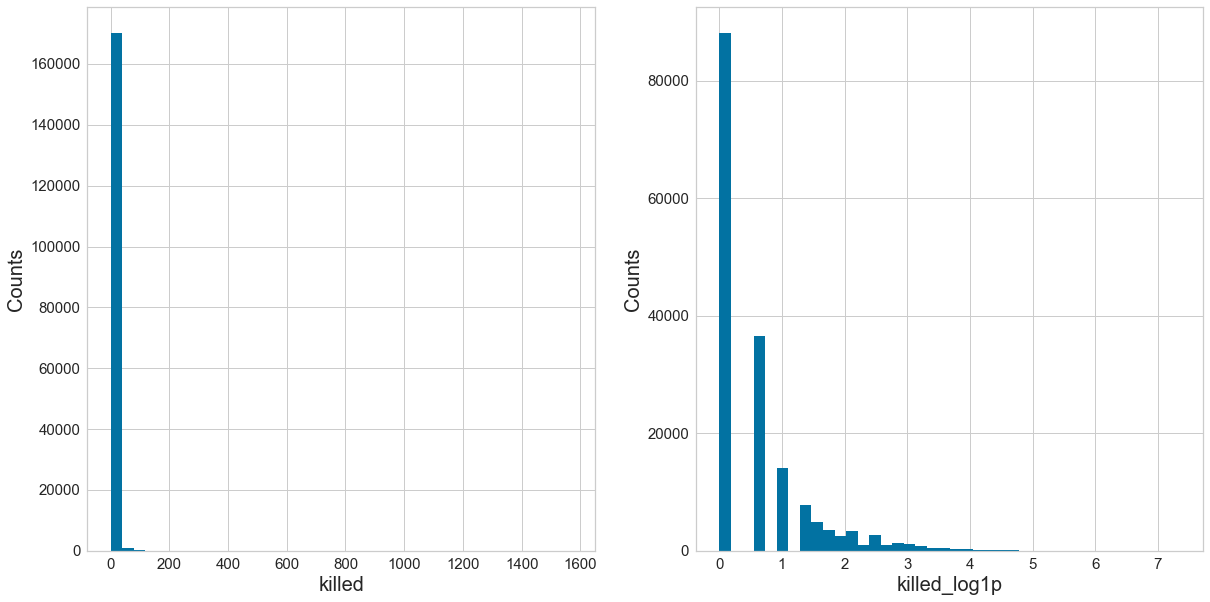

In [43]:
plt.rcParams["figure.figsize"] = (20,10)
fig, axes = plt.subplots(nrows = 1, ncols = 2)
plot_data = ["killed", "killed_log1p"]
x_axis = plot_data
y_axis = ["Counts", "Counts"]
axes = axes.ravel()

for idx, ax in enumerate(axes):
    ax.hist(terrorism[plot_data[idx]].dropna(), bins = 40)
    ax.set_xlabel(x_axis[idx], fontsize = 20)
    ax.set_ylabel(y_axis[idx], fontsize = 20)
    ax.tick_params(axis = "both", labelsize = 15)

plt.show()

**Convert categorical data to numbers.**

First we define the categorical variables and the numeric designation we want to have reassigned.

In [44]:
cat_features = ["attack_type", "region"]
terrorism_cat = terrorism[cat_features]
terrorism_cat = terrorism_cat.replace({"region": {1: "N_America", 2: "C_America", 3: "S_America", 4: "E_Asia", 5: "SE_Asia", 6: "S_Asia", 7: "C_Asia", 8: "W_Europe", 9: "E_Europe", 10: "Middle_East", 11: "Saharan_Africa", 12: "Australasia"}})

We now use One Hot Encoding to make the replacement.

In [45]:
terrorism_cat_dummies = pd.get_dummies(terrorism_cat)

Let's check the results.

In [46]:
print(terrorism_cat_dummies.head(10))

   attack_type_Armed Assault  attack_type_Assassination  \
0                          0                          1   
1                          0                          0   
2                          0                          1   
3                          0                          0   
4                          0                          0   
5                          1                          0   
6                          0                          1   
7                          0                          0   
8                          0                          0   
9                          0                          0   

   attack_type_Bombing/Explosion  attack_type_Facility/Infrastructure Attack  \
0                              0                                           0   
1                              0                                           0   
2                              0                                           0   
3                             

Our One Hot Encoding appears to have been successful.

# PART 3

**We are going to create a features dataset that can be used for trainng and validation.**

The first step is to combine the numerical features and the dummy features we created in Part 2.

In [47]:
features_model = ["incident_year", "incident_month", "Country_log1p"]
data_model_X = pd.concat([terrorism[features_model], terrorism_cat_dummies], axis = 1)
data_model_X.head(5)

,incident_year,incident_month,Country_log1p,attack_type_Armed Assault,attack_type_Assassination,attack_type_Bombing/Explosion,attack_type_Facility/Infrastructure Attack,attack_type_Hijacking,attack_type_Hostage Taking (Barricade Incident),attack_type_Hostage Taking (Kidnapping),...,region_C_Asia,region_E_Asia,region_E_Europe,region_Middle_East,region_N_America,region_SE_Asia,region_S_America,region_S_Asia,region_Saharan_Africa,region_W_Europe
0,1970,7,4.077537,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1970,6,4.875197,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,1970,1,5.081404,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1970,1,4.369448,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1970,1,4.624973,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


Now that we have successfully combined the two datasets, we can create a target dataset that can be used for trainng and validation.

In [48]:
terrorism["killed"] = terrorism["killed"].notnull().astype(int)
data_model_Y = terrorism.replace({"killed": {1: "People Killed", 0: "Nobody Killed"}})
data_model_Y.head(5)

,incident_year,incident_month,incident_day,country,country_txt,region,region_txt,city,latitude,longitude,attack_type,targtype1_txt,gname,weaptype1_txt,killed,summary,Country_log1p,killed_log1p
0,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,MANO-D,Unknown,People Killed,NaN,4.077537,0.693147
1,1970,6,15,130,Mexico,1,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,People Killed,NaN,4.875197,0.000000
2,1970,1,15,160,Philippines,5,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Unknown,Unknown,People Killed,NaN,5.081404,0.693147
3,1970,1,15,78,Greece,8,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,Nobody Killed,NaN,4.369448,NaN
4,1970,1,15,101,Japan,4,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,Nobody Killed,NaN,4.624973,NaN


Next, we need to separtae into the individual dataset.  

Let's load the required packages.

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_val, Y_train, Y_val = train_test_split(data_model_X, data_model_Y, test_size = 0.3, random_state = 11)

Let's see if that worked.  We can print out the shape of each dataset.

In [51]:
print("Number of samples in training set: ", X_train.shape[0])
print("Number of samples in validation set: ", X_val.shape[0])

Number of samples in training set:  127183
Number of samples in validation set:  54508


Those ratios correspond the the 30% test_size we established earlier.  

Now let's print out the number of "People Killed" and the number of "Nobody Killed" from the various terrorist attacks.  These will be separated into our training and validation datasets.

In [52]:
print("The number of People Killed and Nobody Killed in the training set are: ", Y_train["killed"].value_counts())
print("The number of People Killed and Nobody Killed in the validation set are: ", Y_val["killed"].value_counts())

The number of People Killed and Nobody Killed in the training set are:  People Killed    119986
Nobody Killed      7197
Name: killed, dtype: int64
The number of People Killed and Nobody Killed in the validation set are:  People Killed    51392
Nobody Killed     3116
Name: killed, dtype: int64


**Display the model evaluation metrics.**

First, we need to load the necessary libraries.

In [53]:
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC
%matplotlib inline

Next, we need to instantiate the classification model.

In [54]:
model = LogisticRegression()
Y_train = Y_train["killed"]

Now we need to define the confusion matrix.

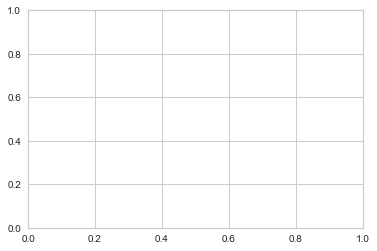

In [55]:
classes = ["Nobody Killed", "People Killed"]
cm = ConfusionMatrix(model, classes = classes, percent = False)

Next, we need to fit the model.

In [56]:
cm.fit(X_train, Y_train)

C:\Users\jeffery.peterson.tm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ConfusionMatrix(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000023E020D94E0>,
        classes=['Nobody Killed', 'People Killed'],
        cmap=<matplotlib.colors.ListedColormap object at 0x0000023E023D2E48>,
        encoder=None, fontsize=None, force_model=False, is_fitted='auto',
        model=None, percent=False, sample_weight=None)

Now we can create the ConfusionMatrix.  We will need some test data for this.  The first metric we can show is the confusion matrix score.  To create the ConfusionMatrix, we need some test data. Score runs predict() on the data and then creates the confusion_matrix from scikit-learn.  Our cm.score() value was:

In [57]:
Y_val = Y_val["killed"]
cm.score(X_val, Y_val)

0.9419901665810523

In [58]:
for label in cm.ax.texts:
    label.set_size(20)

In [59]:
cm.poof()

We did not throw any errors, so let's combine all of the code chunks and produce the actual ConfusionMatrix.

C:\Users\jeffery.peterson.tm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


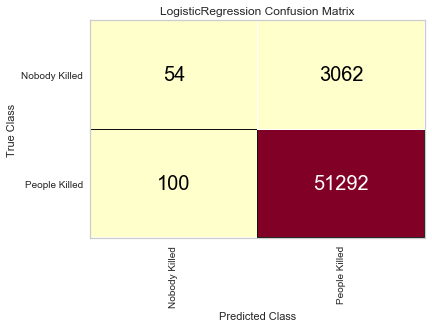

In [60]:
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model 
model = LogisticRegression()

#The ConfusionMatrix visualizer taxes a model
classes = ["Nobody Killed", "People Killed"]
cm = ConfusionMatrix(model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, Y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, Y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

Our results look really good.  Our model was able to successfully predict 51,292 people killed out of a possible 51,392.  
  

We can continue the analysis by determining the precision, recall, and F1 score.  

First, we start off defining the figure and font size.

In [61]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

Now we need to instantiate the visualizer and fit the training data.

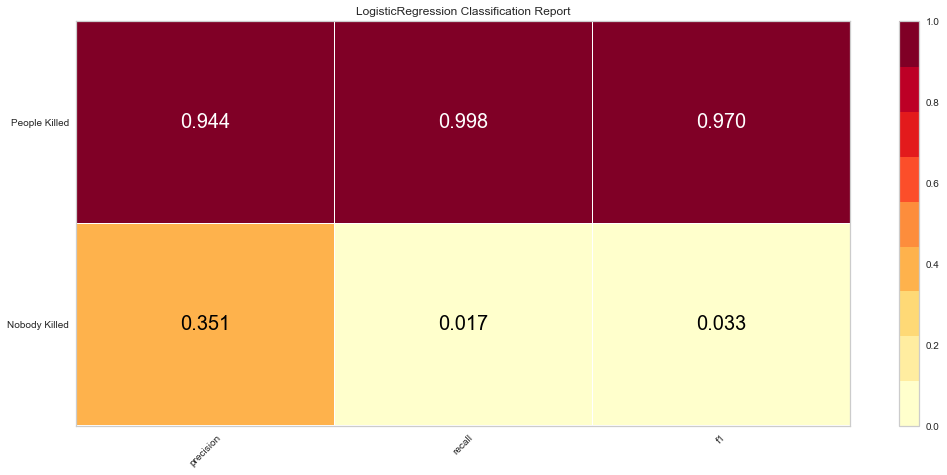

In [62]:
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, Y_train)
visualizer.score(X_val, Y_val)
g = visualizer.poof()

The darker zones in the above Classification Report show the model’s highest areas of performance.  In this example, the model was very good at predicting the number of people killed based on location and attack method.


The final visualizations we want to create are the ROC and AUC curves.  

Again, we need to instantiate the visualizer.

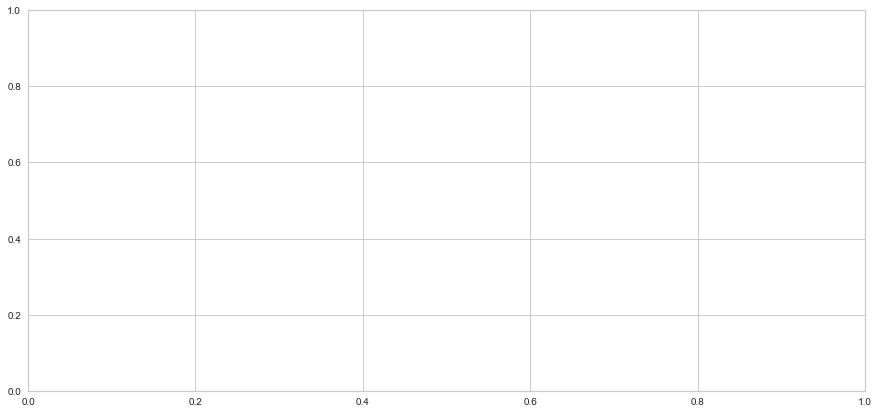

In [63]:
visualizer = ROCAUC(model)

Now we fit the training data to the visualizer and make the curves.

In [64]:
visualizer.fit(X_train, Y_train)
visualizer.score(X_val, Y_val)
g = visualizer.poof()

We didn't throw any errors, so let's combine all the code chunks and make the plots.

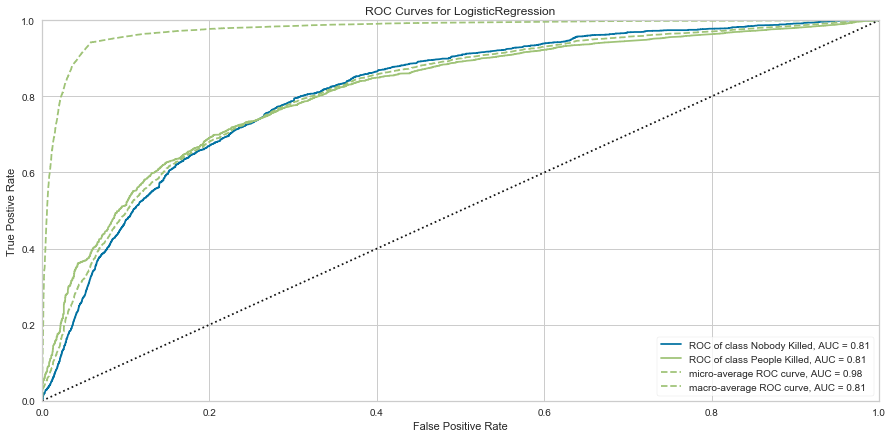

In [65]:
visualizer = ROCAUC(model)
visualizer.fit(X_train, Y_train)
visualizer.score(X_val, Y_val)
g = visualizer.poof()

Our ROC curve looks very good.  A perfect discrimination (no overlap in the two distributions) has a ROC curve that passes through the upper left corner (100% sensitivity, 100% specificity).  Therefore, the closer the ROC curve is to the upper left corner, the higher overall accuracy of the model.  

The AUC value is a measure of how well a parameter can distinguish between two groups (Nobody Killed/People Killed).  The higher the number, the better the ability of the model to make the distinction.  Our results are quite high indicating our model’s ability to correctly make the distinction.